# Introduction to Qiskit

### Installing Dependencies (Qiskit)


In [ ]:
!pip3 install qiskit
!pip3 install qiskit_aer
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pylatexenc
!pip3 install dotenv

**A brief review**

1. Qubits: A *normalized* column vector $\quad$
    $|0> = \begin{pmatrix} 1\\ 0 \end{pmatrix}$
    $|1> = \begin{pmatrix} 0\\ 1 \end{pmatrix}$ $\quad$ $|\psi> = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \alpha|0> + \beta|1>$.

2. Measurement: Qubit collapses to $|0>$ or $|1>$; $\quad$ measure $|\psi>$ $\Rightarrow$ $|0>$ with probability $|\alpha|^2$, $|1>$ with probability $|\beta|^2$ $\Rightarrow$ $|\alpha|^2 + |\beta|^2 = 1$.

3. Gates: Quantum gates are unitary operators $U|\psi> = |\phi>$. Action of any quantum gate is a rotation on the Bloch sphere.

### Importing Required Libraries

In [2]:
import time
import numpy as np                                                      #type: ignore
from qiskit import *                                                    #type: ignore
from qiskit.circuit import Parameter                                    #type: ignore
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp       #type: ignore
from qiskit.circuit.library import RealAmplitudes                       #type: ignore
import matplotlib.pyplot as plt                                         #type: ignore
import matplotlib.ticker as tck                                         #type: ignore
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit   #type: ignore
from qiskit.visualization import plot_histogram, plot_bloch_multivector #type: ignore

### The first quantum circuit

We can define the number of quantum and classical registers that we want. A quantum register is a qubit, and a classical register is a bit that will hold the measurement outcome of the qubit. A QuantumCircuit is an object that takes the quantum and classical registers.

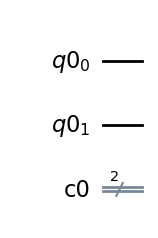

In [3]:
# initialize a quantum circuit with 2 qubits and 2 cbits

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr) #for taking measurements
qc.draw('mpl') #to draw the quantum circuit

All qubits are initialized in |0>. In the Bloch sphere representation, this is the north pole. This is a 2-qubit system, so there should be two Bloch spheres, one for each qubit -- both of them pointing to the north pole.

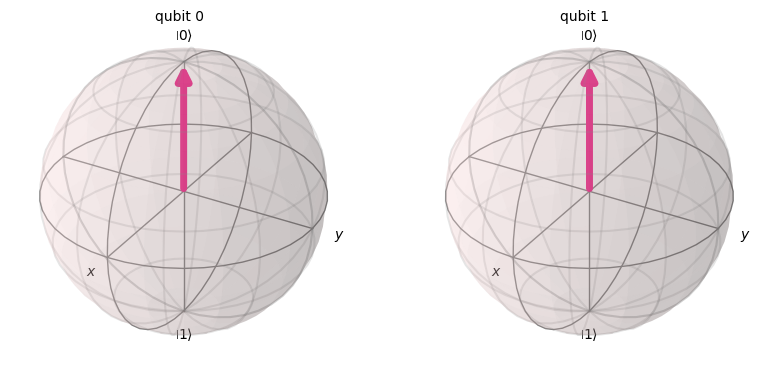

In [4]:
plot_bloch_multivector(qc)

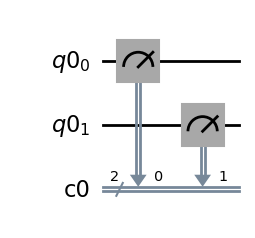

In [5]:
qc.measure(qr,cr) # for measurng the circuit (abc.messure(qr,cr))
qc.draw('mpl')

In order to simulate the circuit, we need to define a simulator to run the circuit. We shall use Qiskit Aer for simulation.

In [6]:
from qiskit_aer import Aer

We will use Statevector simulator to simulate statevectors

In [7]:
simulator = Aer.get_backend("statevector_simulator") # (aer.get_backent we get differt types of simmulators)
result = simulator.run(qc).result()

To retrieve the statevector, we will use the `get_statevector()` method.

In [8]:
sv = result.get_statevector()
print(sv)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


### Let's create a bell state $\ket{\Phi^+}$

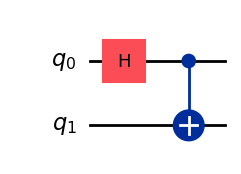

In [9]:
#To draw quantum Bell state
qc = QuantumCircuit(2)
qc.h(0) #hadamard gate
qc.cx(0 ,1) #qc gate on next qbit
qc.draw('mpl')

Let us verify our notion using Bloch sphere.

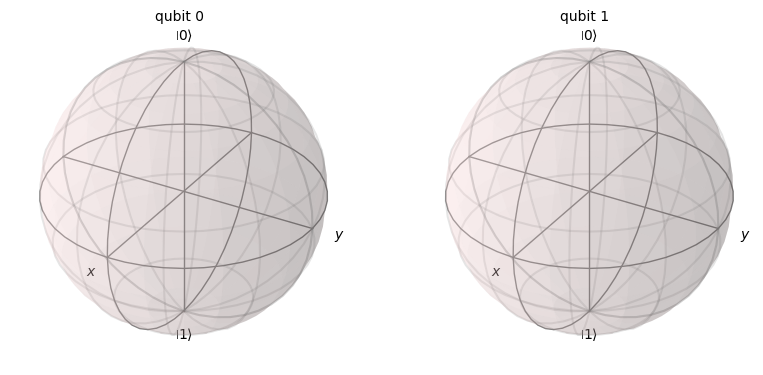

In [10]:
plot_bloch_multivector(qc) #both the qubits are entagled so their q-sphere will be same can't do anything in this q-sphere is not suggested

When we measure these two qubits, the first qubit should collapse to 1, and the second to 0, with probability 1.

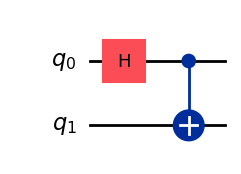

In [11]:
qc.draw('mpl')

In [12]:
result = simulator.run(qc).result()
sv = result.get_statevector()
print(sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


### To simulate the same circuit using shot based simulater, we will use QASM simulator
QASM simulate the outcomes of quantum circuits and algorithms in varety of ways.

In [13]:
simulator = Aer.get_backend("qasm_simulator")
qc.measure_all()
result = simulator.run(qc).result()
counts = result.get_counts() #to get counts from simulator use (abc.get_counts)
print(counts)

{'11': 515, '00': 509}


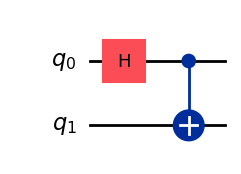

In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0 ,1)
qc.draw('mpl')

 Let's implement logic gates using quantum circuits

In [15]:
simulator = Aer.get_backend("qasm_simulator")

#### 1. NOT Gate

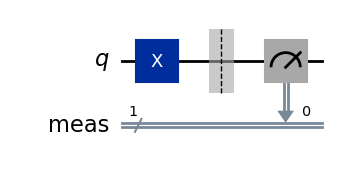

In [16]:
not_gate = QuantumCircuit(1) # Implement your circuit here
not_gate.x(0)
not_gate.measure_all()
not_gate.draw('mpl')

In [17]:
result= simulator.run(not_gate).result()
counts= result.get_counts()
print(counts)

{'1': 1024}


#### 2. XOR Gate

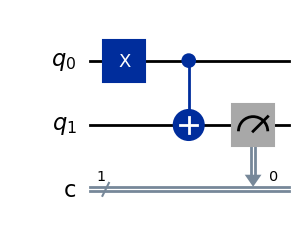

In [18]:
xor_gate = QuantumCircuit(2,1) # Implement your circuit here
xor_gate.x(0)
xor_gate.cx(0,1)
xor_gate.measure(1,0)
xor_gate.draw('mpl')

In [19]:
result= simulator.run(xor_gate).result()
counts= result.get_counts()
print(counts)

{'1': 1024}


#### 3. AND Gate

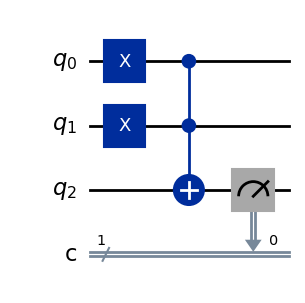

In [20]:
and_gate = QuantumCircuit(3,1) # Implement your circuit here
and_gate.x(0)
and_gate.x(1)
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw('mpl')

In [21]:
result= simulator.run(and_gate).result()
counts= result.get_counts()
print(counts)

{'1': 1024}


#### 4. OR Gate





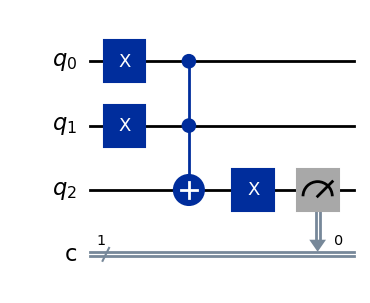

In [22]:
or_gate = QuantumCircuit(3,1) # Implement your circuit here
or_gate.x(1)
or_gate.x(0)
or_gate.ccx(0,1,2)
or_gate.x(2)
or_gate.measure(2,0)
or_gate.draw('mpl')


In [23]:
result= simulator.run(or_gate).result()
counts= result.get_counts()
print(counts)

{'0': 1024}


Q3. Implement GHZ state $\frac{1}{\sqrt{2}}(\ket{000} + \ket{111})$

GHZ state is a certain type of entangled quantum state that involves atlest 3 subsystems (particle state, qubits or qudits)


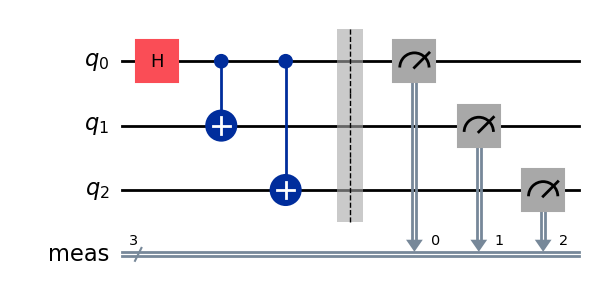

In [24]:
ghz =  QuantumCircuit(3) # Implement your circuit here
ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)
ghz.measure_all()
ghz.draw('mpl')

In [25]:
hidden="001"
print(len(hidden))

3


For this hidden string, we need 3 input qubits and 1 output qubit.

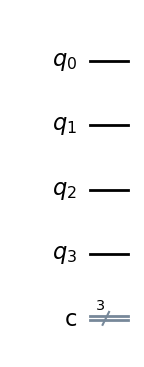

In [26]:
#make a quantum circuit
qc = QuantumCircuit(4, 3)
display(qc.draw(output="mpl"))

Step 1. Initialize the inputs qubits to the state $|0\rangle^{\otimes n}$, and output qubit to $|-\rangle$.

At first every qubit is initialized as $|0\rangle$ so we don't have to apply any gate for input qubits. However, the output qubit state should be changed as $|-\rangle$. For it, we will apply X-gate and then H-gate (Hadamard gate).

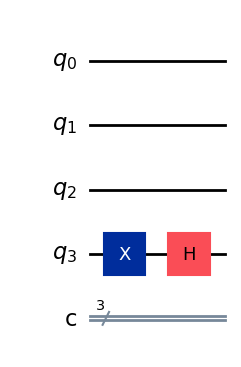

In [27]:
qc.x(3)
qc.h(3)
display(qc.draw(output="mpl"))

Step 2. Apply Hadamard gates to the input register.




We will apply Hadamard gates to each input qubit.

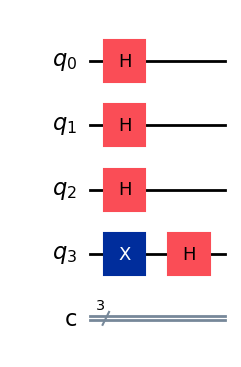

In [28]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

Step 3. Query the oracle.

We will use CNOT gate to query the oracle. As our hidden circuit is "001", we will apply CNOT gate to qubit 0 and the output gate. Note: In Qiskit, numbers are assigned to the bits in a string **from right to left**.

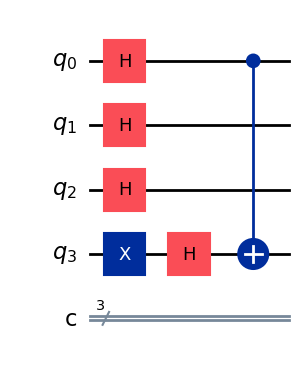

In [29]:
qc.cx(0,3)
display(qc.draw(output="mpl"))

Step 4. Apply Hadamard gates to the input register.

We will apply Hadamard gates to each input qubit again.

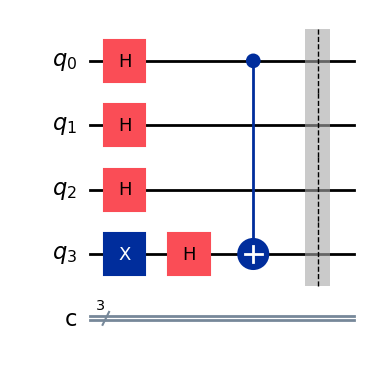

In [30]:
qc.barrier()
display(qc.draw(output="mpl"))

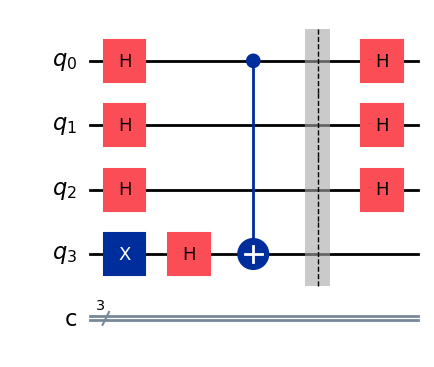

In [31]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

Step 5. Measure.

We will measure all the input qubits with measure method.

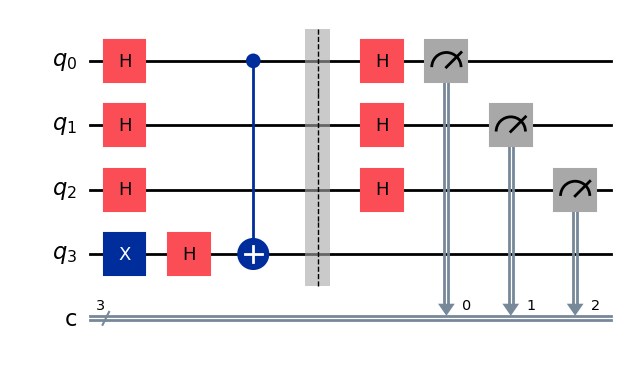

In [32]:
qc.measure(range(3), range(3))
display(qc.draw(output="mpl"))

In [33]:
result= simulator.run(qc).result()
counts= result.get_counts()
print(counts)

{'001': 1024}


## IBM Quantum Cloud Demo

In [ ]:
!pip3 install qiskit
!pip3 install qiskit-ibm-runtime
!pip3 install qiskit-ibm-provider
!pip3 install dotenv

In [10]:
from dotenv import load_dotenv
from qiskit_ibm_provider import IBMProvider
import os

load_dotenv()

# Create a .env file in the same directory as this notebook.
# Then, name a environment in it: "IBMQ_API_TOKEN" with the value that us your API key.
ibm_token = os.getenv("IBMQ_API_TOKEN")

if not ibm_token:
    print("Error: Token not found in environment variables")
    print("Available environment variables:", os.environ.keys())
    exit(1)

IBMProvider.save_account(token=ibm_token, overwrite=True)

provider = IBMProvider()

backends = provider.backends()
print("Available backends:", [backend.name for backend in backends])

Available backends: ['ibm_brisbane', 'ibm_sherbrooke', 'ibm_kyiv']


### IBM Quantum Cloud Demo: Hello World

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

# Create observation tables
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

# Start the cloud process.
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cz25w891xvhg008dv68g
